# Set up workspace

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from scipy import stats
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils/')

from load_gridcell_areas import *

In [4]:
from load_ensembles import *

In [5]:
import make_multisimulation_dataset

# Load data

In [6]:
fpath_data='/glade/work/czarakas/coupled_PPE/data/annual_means/'
fpath_kernels='/glade/work/czarakas/coupled_PPE/data/Lague_kernels/'

### Load offline model data

In [7]:
ref_key='OFFL0000_PI_v02'

In [8]:
prefixes=crosswalk.key_landonlyPPE.values+'_PI_v02'

In [9]:
ref_Ts=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.Ts.nc')['Ts']
ref_albedo=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.albedo_snowmasked.nc')['albedo_snowmasked']
ref_albedo_wSnow=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.albedo.nc')['albedo']
ref_Rs=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.Rs.nc')['Rs']
ref_vegHeight=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.veg_height.nc')['veg_height']

ref_WTGQ=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.WTGQ.nc')['WTGQ']
ref_soilresis=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.SOILRESIS.nc')['SOILRESIS']
ref_TAUX=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.TAUX.nc')['TAUX']
ref_TAUY=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.TAUY.nc')['TAUY']

In [10]:
ds_grid = ref_Ts.to_dataset('Ts').rename_dims(dims_dict={'month':'time'})
deltas_albedo = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()
deltas_albedo_wSnow = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()
deltas_Ts = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()
deltas_Rs = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()
deltas_vegHeight = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()

deltas_WTGQ = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()
deltas_soilResis = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()
deltas_TAUX = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()
deltas_TAUY = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()

In [11]:
#plt.figure(figsize=(15,15))
counter=0
for i in np.arange(0,36):
    prefix=prefixes[i]

    ds_albedo=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.albedo_snowmasked.nc')['albedo_snowmasked']
    ds_albedo_wSnow=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.albedo.nc')['albedo']
    ds_Rs=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.Rs.nc')['Rs']
    ds_Rsoil=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.SOILRESIS.nc')['SOILRESIS']
    ds_Ts=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.Ts.nc')['Ts']
    ds_vegHeight=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.veg_height.nc')['veg_height']
    ds_WGTQ=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.WTGQ.nc')['WTGQ']
    ds_TAUX=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.TAUX.nc')['TAUX']
    ds_TAUY=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.TAUY.nc')['TAUY']

    delta_Ts=(ds_Ts-ref_Ts)
    delta_albedo=(ds_albedo-ref_albedo)
    delta_albedo_wSnow=(ds_albedo_wSnow-ref_albedo_wSnow)
    delta_Rs=(ds_Rs-ref_Rs)
    delta_Rsoil=(ds_Rsoil-ref_soilresis)
    delta_vegHeight=(ds_vegHeight-ref_vegHeight)
    delta_WTGQ=(ds_WGTQ-ref_WTGQ)
    delta_TAUX=(ds_TAUX-ref_TAUX)
    delta_TAUY=(ds_TAUY-ref_TAUY)
    
    deltas_Ts[:,:,:,i]=delta_Ts.values
    deltas_albedo[:,:,:,i]=delta_albedo.values
    deltas_albedo_wSnow[:,:,:,i]=delta_albedo_wSnow.values
    deltas_Rs[:,:,:,i]=delta_Rs.values
    deltas_soilResis[:,:,:,i]=delta_Rsoil.values
    deltas_vegHeight[:,:,:,i]=delta_vegHeight.values
    deltas_WTGQ[:,:,:,i]=delta_WTGQ.values
    deltas_TAUX[:,:,:,i]=delta_TAUX.values
    deltas_TAUY[:,:,:,i]=delta_TAUY.values
    

### Load coupled model data

In [12]:
ref_key_coupled='COUP0000_PI_SOM'
prefixes_coupled=crosswalk.key_coupledPPE.values+'_PI_SOM_v02'
deltas_Ts_coupled = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var='Ts', keys=keys).expand_dims(dim={"month": 12}).copy()

In [13]:
ref_Ts=xr.open_dataset(fpath_data+ref_key+'.clm2.h0.annual_averages.Ts.nc')['Ts']

In [14]:
#plt.figure(figsize=(15,15))
counter=0
for i in np.arange(0,36):
    prefix=prefixes_coupled[i]
    ds_Ts=xr.open_dataset(fpath_data+prefix+'.clm2.h0.annual_averages.Ts.nc')['Ts']

    delta_Ts=(ds_Ts-ref_Ts)

    deltas_Ts_coupled[:,:,:,i]=delta_Ts.values
    

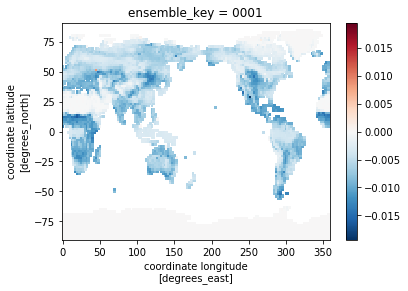

In [22]:
deltas_albedo_wSnow.mean(dim='month')[:,:,0].plot()

# Make figures of changes in surface properties

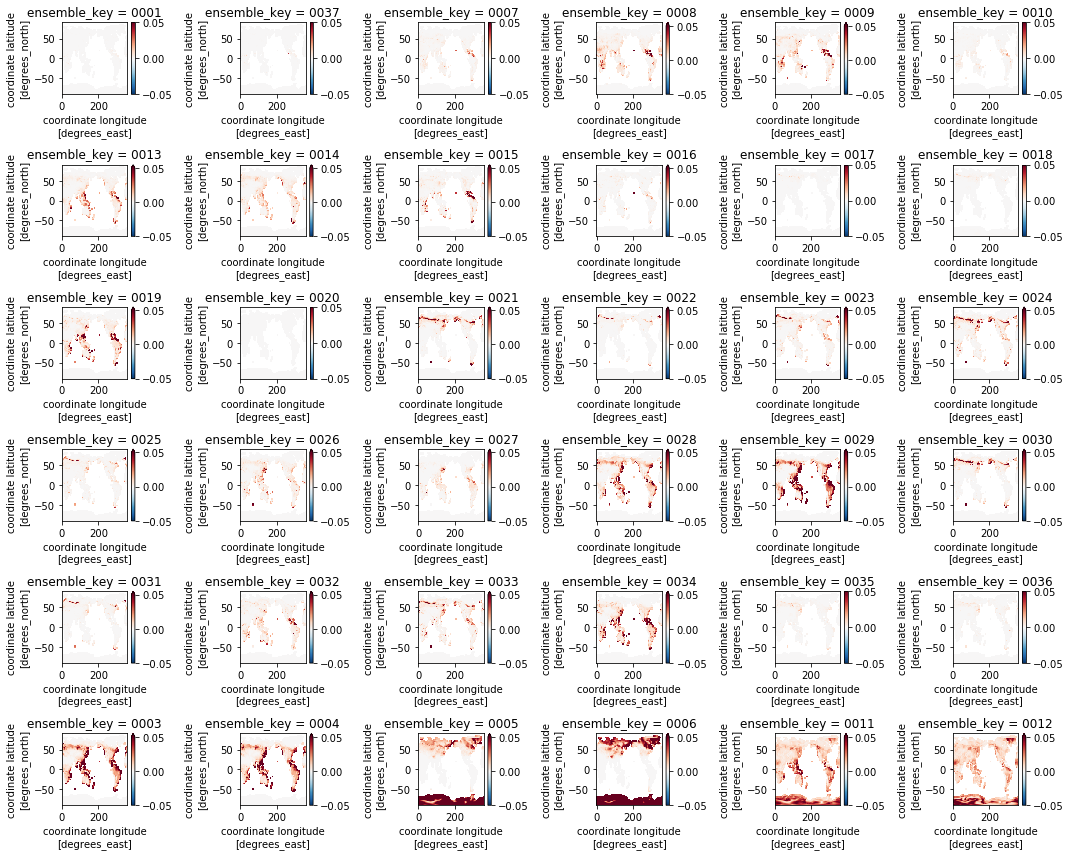

In [189]:
plt.figure(figsize=(15,12))
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    #print(crosswalk.description.values[i])
    (np.abs(deltas_TAUX)+np.abs(deltas_TAUY)).mean(dim='month')[:,:,i].plot(vmin=-0.05, vmax=0.05, cmap=plt.cm.RdBu_r)
plt.tight_layout()

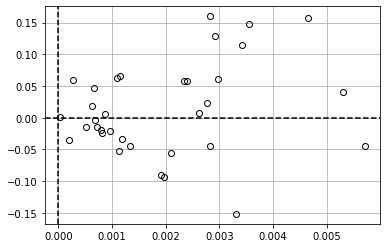

In [115]:
x=(np.abs(deltas_albedo_wSnow.mean(dim='month'))*landweights).mean(dim=['lat','lon'])
y=(deltas_Ts.mean(dim='month')*landweights).mean(dim=['lat','lon'])
plt.plot(x[:-2],y[:-2],'o', markeredgecolor='k',fillstyle='none')
plt.grid()
plt.axhline(y=0, linestyle='--',color='k')
plt.axvline(x=0, linestyle='--',color='k')

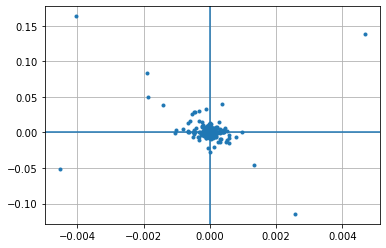

In [116]:
i=13
plt.plot(deltas_albedo.mean(dim='month')[:,:,i].values.flatten(),
         deltas_Ts.mean(dim='month')[:,:,i].values.flatten(),'.')
plt.axhline(y=0)
plt.axvline(x=0)
plt.grid()

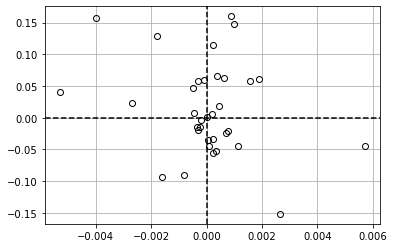

In [117]:
x=((deltas_albedo_wSnow.mean(dim='month'))*landweights).mean(dim=['lat','lon'])
y=(deltas_Ts.mean(dim='month')*landweights).mean(dim=['lat','lon'])
plt.plot(x[:-2],y[:-2],'o', markeredgecolor='k',fillstyle='none')
plt.grid()
plt.axhline(y=0, linestyle='--',color='k')
plt.axvline(x=0, linestyle='--',color='k')

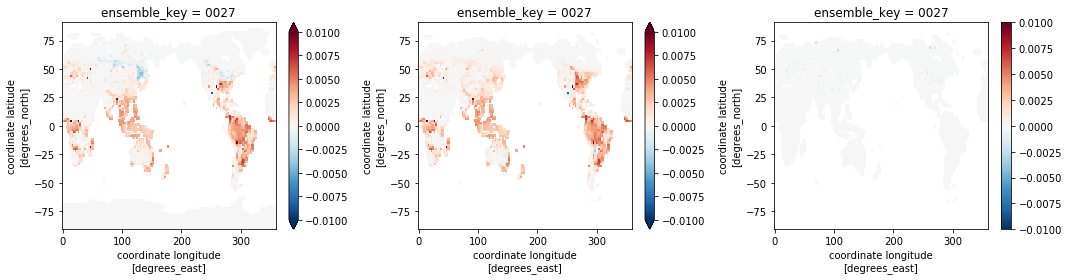

In [118]:
i=20
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
(deltas_albedo_wSnow).mean(dim='month')[:,:,i].plot(vmin=-0.01, vmax=0.01, cmap=plt.cm.RdBu_r)
plt.subplot(1,3,2)
(deltas_albedo).mean(dim='month')[:,:,i].plot(vmin=-0.01, vmax=0.01, cmap=plt.cm.RdBu_r)
plt.subplot(1,3,3)
(deltas_albedo_wSnow-deltas_albedo).mean(dim='month')[:,:,i].plot(vmin=-0.01, vmax=0.01, cmap=plt.cm.RdBu_r)
plt.tight_layout()

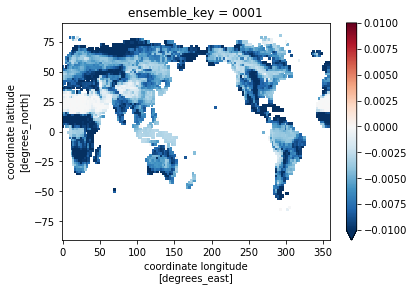

In [119]:
deltas_albedo.mean(dim='month')[:,:,0].plot(vmin=-0.01, vmax=0.01, cmap=plt.cm.RdBu_r)

# Load kernels

In [15]:
deltaTs_deltaAlbedo_offline=xr.open_dataset(fpath_kernels+'offline_deltaTs_deltaAlbedo.nc')['deltaTs_deltaAlbedo']
deltaTs_deltaRs_offline=xr.open_dataset(fpath_kernels+'offline_deltaTs_deltaRs.nc')['deltaTs_deltaRs']

In [16]:
ds_deltaTs_deltaVegHeight=xr.open_dataset(fpath_kernels+'coupled_deltaTs_deltaHc_allHeights.nc')
deltaTs_deltaAlbedo=xr.open_dataset(fpath_kernels+'coupled_deltaTs_deltaAlbedo.nc')['coupled_deltaTs_deltaAlbedo']
deltaTs_deltaRs=xr.open_dataset(fpath_kernels+'coupled_ds_deltaTs_deltaRs.nc')['coupled_deltaTs_deltaRs']

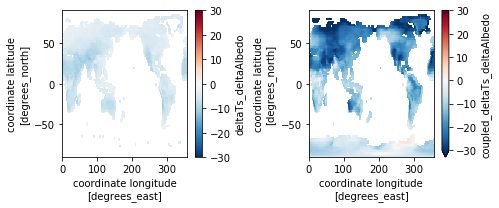

In [17]:
vmax=30
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
deltaTs_deltaAlbedo_offline.plot(vmax=vmax, vmin=-vmax, cmap=plt.cm.RdBu_r)
plt.subplot(1,2,2)
deltaTs_deltaAlbedo.plot(vmax=vmax)
plt.tight_layout()

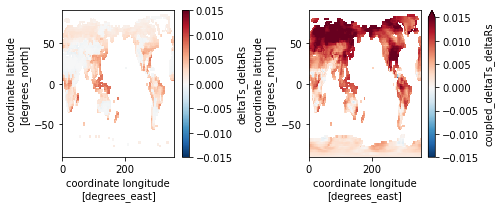

In [18]:
vmax=0.015
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
deltaTs_deltaRs_offline.plot(vmax=vmax, vmin=-vmax, cmap=plt.cm.RdBu_r)
plt.subplot(1,2,2)
deltaTs_deltaRs.plot(vmax=vmax)
plt.tight_layout()

# Calculate Vegetation Height Kernels

In [23]:
avg_ref_vegHeight=(ref_vegHeight.mean(dim='month'))

In [24]:
height_Category=xr.DataArray(
    data=np.zeros(np.shape(ds_deltaTs_deltaVegHeight['TS_change_per_m'])),
    dims=ds_deltaTs_deltaVegHeight['TS_change_per_m'].dims,
    coords=dict(
        start_height=(["start_height"], ds_deltaTs_deltaVegHeight.start_height),
        lat=(["lat"], ds_deltaTs_deltaVegHeight.lat),
        lon=(["lon"], ds_deltaTs_deltaVegHeight.lon)))

height_Category[:]=np.nan

In [25]:
for i,ht in enumerate(ds_deltaTs_deltaVegHeight.start_height.values[:-1]):
    maxheight=ds_deltaTs_deltaVegHeight.start_height.values[i+1]
    
    if i==0:
        height_Category[i,:,:]=((avg_ref_vegHeight<=maxheight))
    else:
        minheight=ds_deltaTs_deltaVegHeight.start_height.values[i]
        print(str(minheight)+' - '+str(maxheight))
        height_Category[i,:,:]=((avg_ref_vegHeight<=maxheight)&
                            (avg_ref_vegHeight>minheight))#,1,np.nan
height_Category[i+1,:,:]=(avg_ref_vegHeight>=maxheight)

0.05 - 0.1
0.1 - 1.0
1.0 - 2.0
2.0 - 5.0
5.0 - 10.0


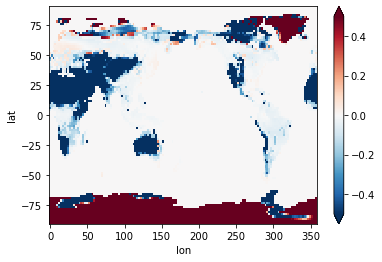

In [26]:
deltaTs_deltaVegHeight=(ds_deltaTs_deltaVegHeight.TS_change_per_m*height_Category).sum(dim='start_height')
deltaTs_deltaVegHeight.plot(vmin=-0.5, vmax=0.5, cmap=plt.cm.RdBu_r)

# Calculate change from vegetation height

In [27]:
ts_delta_from_height=(deltas_vegHeight.mean(dim='month')*deltaTs_deltaVegHeight)

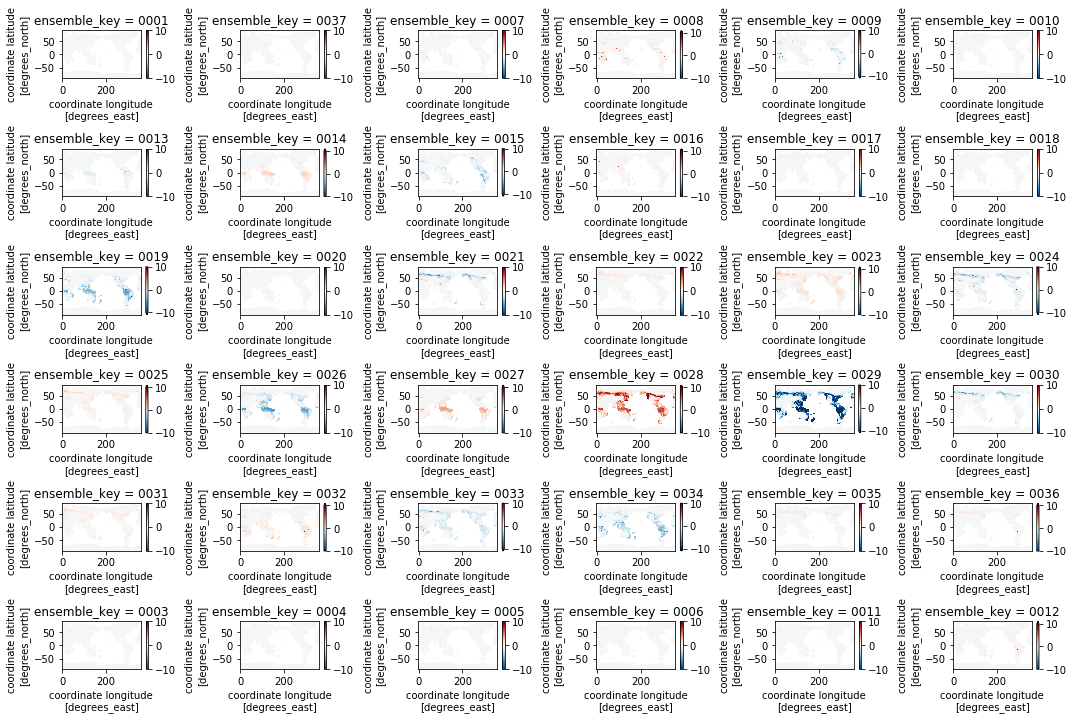

In [28]:
# Figure of magnitude of vegetation height changes

plt.figure(figsize=(15,10))
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    deltas_vegHeight.mean(dim='month')[:,:,i].plot(vmin=-10, vmax=10, cmap=plt.cm.RdBu_r)
plt.tight_layout()

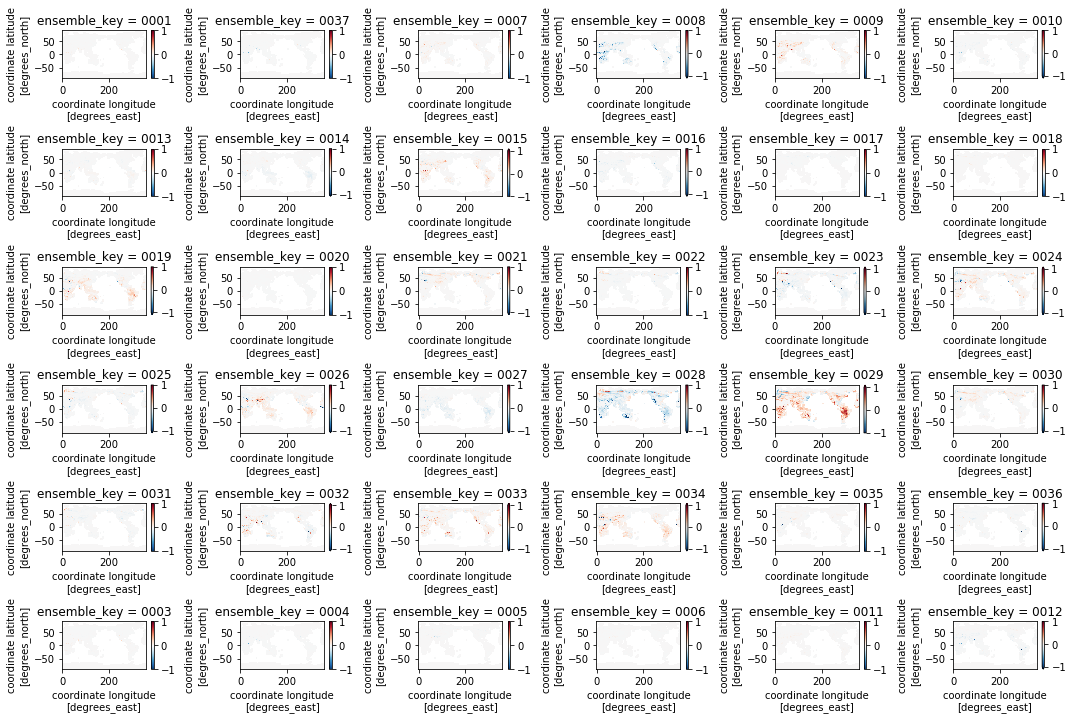

In [29]:
# Figure of temperature impact of vegetation height changes

plt.figure(figsize=(15,10))
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    ts_delta_from_height[:,:,i].plot(vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)
plt.tight_layout()

In [30]:
print(crosswalk.values[22])
print(crosswalk.values[21])

['OAAT0172' 'nstem' 'max' 'yes' 'Vegetation' 'Biomass heat storage'
 'Stem number; number of individuals per meter squared (similar to stocking number) [#/m2]'
 'COUP0029' 'OFFL0029' nan '0029' 'nstem, max']
['OAAT0171' 'nstem' 'min' 'yes' 'Vegetation' 'Biomass heat storage'
 'Stem number; number of individuals per meter squared (similar to stocking number) [#/m2]'
 'COUP0028' 'OFFL0028' nan '0028' 'nstem, min']


# Estimate coupled temperature change from kernels

In [48]:
deltaTs_fromAlbedo=(deltas_albedo_wSnow*deltaTs_deltaAlbedo)
deltaTs_fromRs=(deltas_Rs*deltaTs_deltaRs)
deltaTs_fromVegHeight=(deltas_vegHeight*deltaTs_deltaVegHeight)
deltaTs_estimated=(deltaTs_fromAlbedo+
                   deltaTs_fromRs+
                   deltaTs_fromVegHeight)

deltaTs_actual=deltas_Ts_coupled
deltaTs_error=deltaTs_estimated-deltaTs_actual

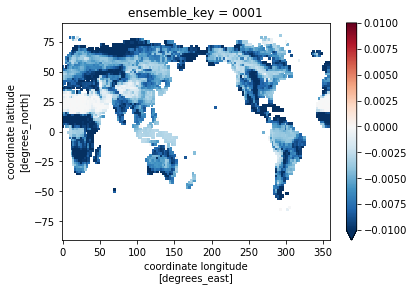

In [49]:
deltas_albedo.mean(dim='month')[:,:,0].plot(vmax=0.01)

rhosnir, min


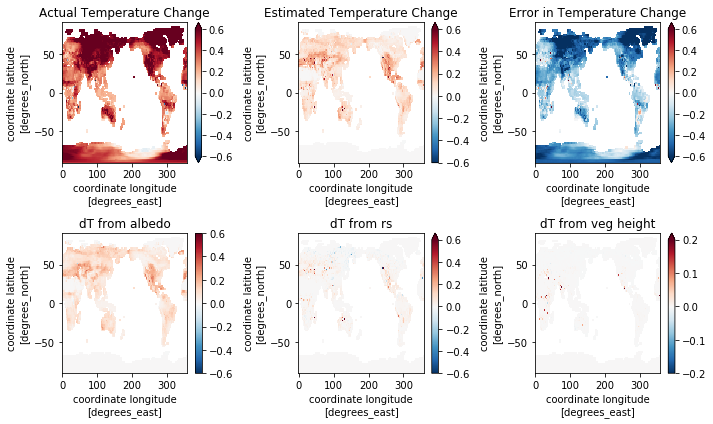

In [50]:
i=0
vmax=0.6
print(crosswalk.description.values[i])
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
deltaTs_actual.mean(dim='month')[:,:,i].plot(vmax=vmax, vmin=-vmax, cmap=plt.cm.RdBu_r)
plt.title('Actual Temperature Change')
plt.subplot(2,3,2)
deltaTs_estimated.mean(dim='month')[:,:,i].plot(vmax=vmax, vmin=-vmax, cmap=plt.cm.RdBu_r)
plt.title('Estimated Temperature Change')
plt.subplot(2,3,3)
deltaTs_error.mean(dim='month')[:,:,i].plot(vmax=vmax, vmin=-vmax, cmap=plt.cm.RdBu_r)
plt.title('Error in Temperature Change')

plt.subplot(2,3,4)
deltaTs_fromAlbedo.mean(dim='month')[:,:,i].plot(vmax=vmax, vmin=-vmax, cmap=plt.cm.RdBu_r)
plt.title('dT from albedo')
plt.subplot(2,3,5)
deltaTs_fromRs.mean(dim='month')[:,:,i].plot(vmax=vmax, vmin=-vmax, cmap=plt.cm.RdBu_r)
plt.title('dT from rs')
plt.subplot(2,3,6)
deltaTs_fromVegHeight.mean(dim='month')[:,:,i].plot(vmax=0.2, vmin=-0.2, cmap=plt.cm.RdBu_r)
plt.title('dT from veg height')

plt.tight_layout()

# Plots of Offline Changes

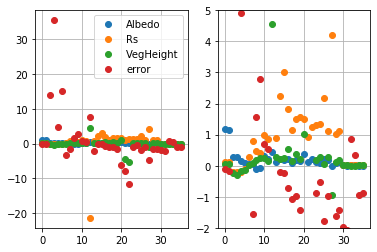

In [215]:
plt.subplot(1,2,1)
plt.plot(deltaTs_fromAlbedo_global/deltas_Ts_global,'o', label='Albedo')
plt.plot(deltaTs_fromRs_global/deltas_Ts_global,'o', label='Rs')
plt.plot(deltaTs_fromVegHeight_global/deltas_Ts_global,'o', label='VegHeight')
plt.plot(deltaTs_error_global/deltas_Ts_global,'o', label='error')
#plt.plot(deltaTs_error_global/deltas_Ts_global,'o')
#plt.ylim([-2,5])
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(deltaTs_fromAlbedo_global/deltas_Ts_global,'o')
plt.plot(deltaTs_fromRs_global/deltas_Ts_global,'o')
plt.plot(deltaTs_fromVegHeight_global/deltas_Ts_global,'o')
plt.plot(deltaTs_error_global/deltas_Ts_global,'o')
#plt.plot(deltaTs_error_global/deltas_Ts_global,'o')
plt.ylim([-2,5])
plt.grid()

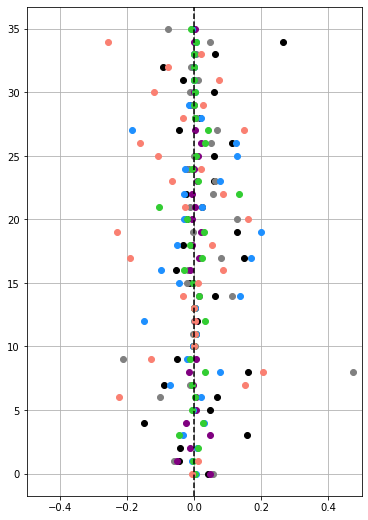

In [216]:
deltas_Ts_global=(deltas_Ts.mean(dim='month')*landweights).mean(dim=['lat','lon'])
deltaTs_estimated_global=(deltaTs_estimated.mean(dim='month')*landweights).mean(dim=['lat','lon'])
deltaTs_fromAlbedo_global=(deltaTs_fromAlbedo.mean(dim='month')*landweights).mean(dim=['lat','lon'])
deltaTs_fromRs_global=(deltaTs_fromRs.mean(dim='month')*landweights).mean(dim=['lat','lon'])
deltaTs_fromVegHeight_global=(deltaTs_fromVegHeight.mean(dim='month')*landweights).mean(dim=['lat','lon'])
deltaTs_error_global=(deltaTs_error.mean(dim='month')*landweights).mean(dim=['lat','lon'])
plt.figure(figsize=(6,9))
for i in np.arange(0,36):
    plt.plot([deltas_Ts_global[i]],[i],'ok', label='Actual')
    plt.plot([deltaTs_estimated_global[i]],[i],'o',color='gray',label='Estimated')
    plt.plot([deltaTs_fromAlbedo_global[i]],[i],'o',color='purple',label='Estimated')
    plt.plot([deltaTs_fromRs_global[i]],[i],'o',color='dodgerblue',label='Estimated')
    plt.plot([deltaTs_fromVegHeight_global[i]],[i],'o',color='limegreen',label='Estimated')
    plt.plot([deltaTs_error_global[i]],[i],'o',color='salmon',label='Estimated')
plt.axvline(x=0, color='k',linestyle='--')
plt.xlim([-0.5, 0.5])
plt.grid()

# Look at changes in quantities

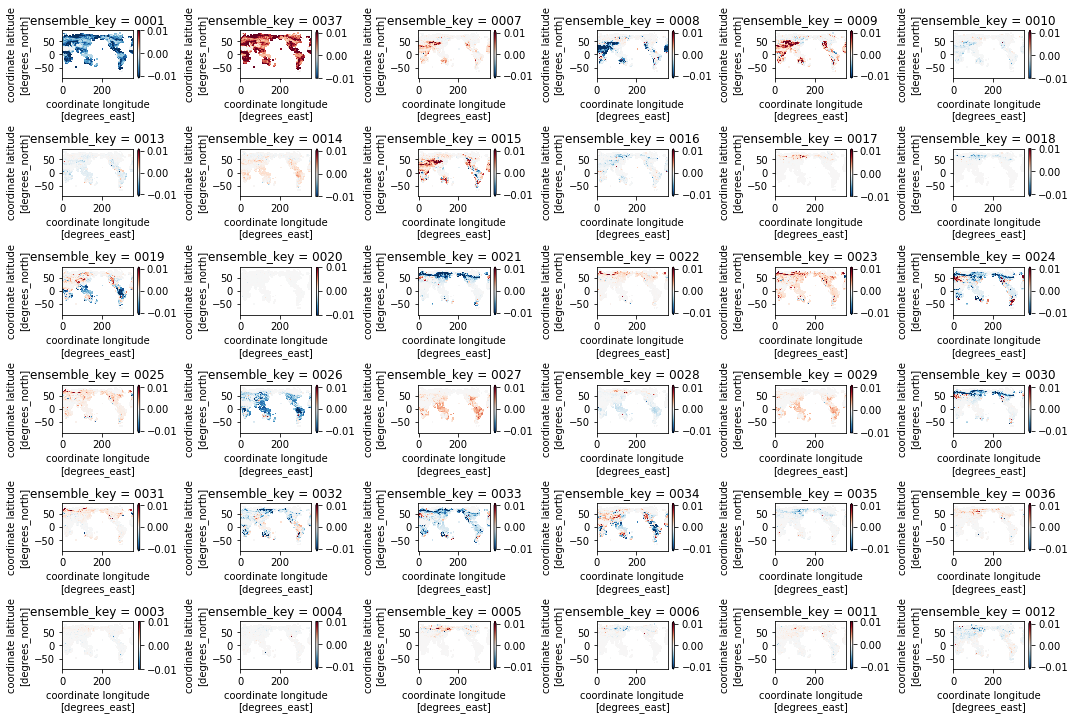

In [217]:
plt.figure(figsize=(15,10))
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    deltas_albedo.mean(dim='month')[:,:,i].plot(vmin=-0.01, vmax=0.01, cmap=plt.cm.RdBu_r)
plt.tight_layout()

# Look at just one ensemble member

In [218]:
Looks good!
0-1,13
Looks bad!
2-6,8,10-11, 21
z0mr,zsno,zetamaxstable (30-35)

OK
7,9,12, 14,16-17

SyntaxError: invalid syntax (<ipython-input-218-b81680cb1aca>, line 1)

In [226]:
i=3
print(crosswalk.description.values[i])

d_max, max


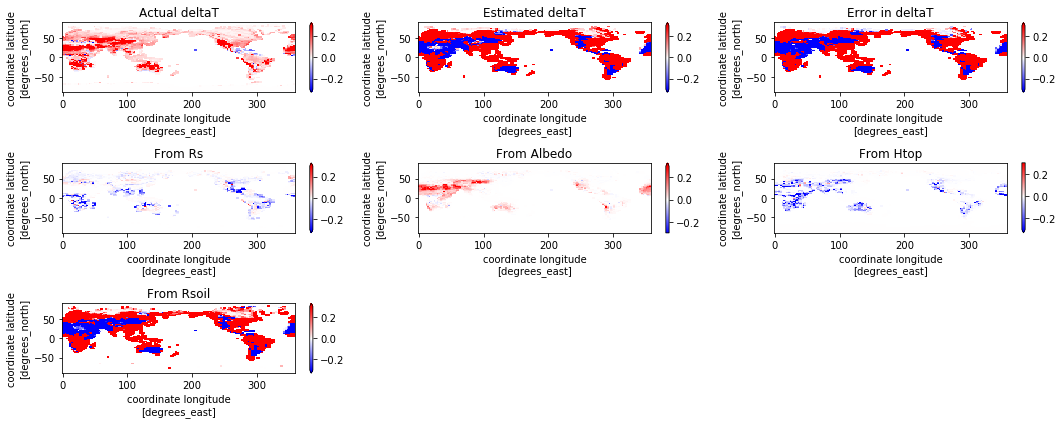

In [227]:
vmin=-0.3
vmax=0.3
plt.figure(figsize=(15,6))
plt.subplot(3,3,1)
deltas_Ts[:,:,:,i].mean(dim='month').plot(vmin=vmin, 
                                  vmax=vmax, 
                                  cmap=plt.cm.bwr)
plt.title('Actual deltaT')
plt.subplot(3,3,2)
deltaTs_estimated[:,:,:,i].mean(dim='month').plot(vmin=vmin, 
                                  vmax=vmax, 
                                  cmap=plt.cm.bwr)
plt.title('Estimated deltaT')
plt.subplot(3,3,3)
(deltaTs_error[:,:,:,i].mean(dim='month')).plot(vmin=vmin, 
                                  vmax=vmax, 
                                  cmap=plt.cm.bwr)
plt.title('Error in deltaT')
plt.subplot(3,3,4)
(deltaTs_fromRs[:,:,:,i].mean(dim='month')).plot(vmin=vmin, 
                                                  vmax=vmax, 
                                                  cmap=plt.cm.bwr)
plt.title('From Rs')

plt.subplot(3,3,5)
(deltaTs_fromAlbedo[:,:,:,i].mean(dim='month')).plot(vmin=vmin, 
                                                  vmax=vmax, 
                                                  cmap=plt.cm.bwr)
plt.title('From Albedo')

plt.subplot(3,3,6)
(deltaTs_fromVegHeight[:,:,:,i].mean(dim='month')).plot(vmin=vmin, 
                                                  vmax=vmax, 
                                                  cmap=plt.cm.bwr)
plt.title('From Htop')

plt.subplot(3,3,7)
(deltaTs_fromRsoil[:,:,:,i].mean(dim='month')).plot(vmin=vmin, 
                                                  vmax=vmax, 
                                                  cmap=plt.cm.bwr)
plt.title('From Rsoil')

plt.tight_layout()

# Analyze albedo changes

In [ ]:
avg_land_albedo=(deltas_albedo.mean(dim='month')*landweights).mean(dim=['lat','lon'])

In [123]:
greater_than_pt1=((deltas_albedo.mean(dim='month')>0.001)*landweights).mean(dim=['lat','lon'])
less_than_negpt1=((deltas_albedo.mean(dim='month')<-0.001)*landweights).mean(dim=['lat','lon'])
smallchange=1-greater_than_pt1-less_than_negpt1

In [124]:
d = {'greater_than_pt1': greater_than_pt1.values, 
     'less_than_negpt1': less_than_negpt1.values,
    'smallchange':smallchange.values}
df = pd.DataFrame(data=d)

In [201]:
df['greater_than_0.2']=df['greater_than_pt1']>0.2
df['greater_than_0.1']=df['greater_than_pt1']>0.15
df['less_than_0.2']=df['less_than_negpt1']<0.2
df['less_than_0.1']=df['less_than_negpt1']<0.15

In [202]:
df_sorted=df.sort_values(by=['greater_than_0.1','less_than_0.1',
                            'greater_than_pt1'],
                             #'greater_than_0.1','less_than_0.1',
                             ascending=False)

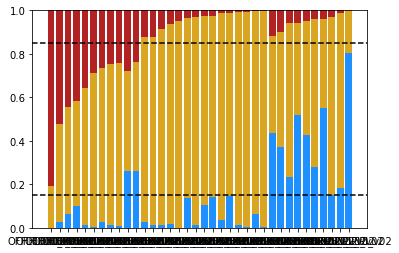

In [204]:
plt.bar(prefixes,df_sorted.less_than_negpt1.values,color='dodgerblue')
plt.bar(prefixes,df_sorted.smallchange.values, 
        bottom=df_sorted.less_than_negpt1.values,color='goldenrod')
plt.bar(prefixes,df_sorted.greater_than_pt1.values, 
        bottom=df_sorted.smallchange.values+df_sorted.less_than_negpt1.values,color='firebrick')
plt.axhline(y=0.15,linestyle='--',color='k')
plt.axhline(y=0.85,linestyle='--',color='k')

#X

In [226]:
avg_land_albedo=(deltas_albedo.mean(dim='month')*landweights).mean(dim=['lat','lon'])
avg_land_ts=(deltas_Ts.mean(dim='month')*landweights).mean(dim=['lat','lon'])
avg_land_Rs=(deltas_Rs.mean(dim='month')*landweights).mean(dim=['lat','lon'])

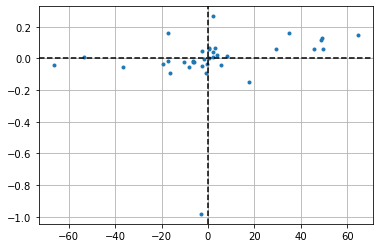

In [227]:
plt.plot(avg_land_Rs,avg_land_ts,'.')
plt.grid()
plt.axhline(y=0,linestyle='--',color='k')
plt.axvline(x=0,linestyle='--',color='k')

In [ ]:
ds=xr.open_dataset(